### Import Necessary Module and Set Path 

In [10]:
import sqlite3 as lite
import os
import sys
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [11]:
import analysis as an
import random_lifetime_extension as rle
import cyclus_input_gen.from_pris as fp
import cyclus_input_gen.demand_deploy as dd

## Create Cyclus Input file with varying breeding ratios

In [12]:
def replace(input_string, replace_start, replace_end, replacement_string, insert=False):
    """ replaces parts of the string with a replacement file"""
    start = input_string.find(replace_start)
    end = input_string.find(replace_end)
    print(start)
    print(end)
    if start == -1 or end == -1:
        print('there is a negative one here')
    if not insert:
        result = input_string.replace(input_string[start:end], replacement_string)
    if insert:
        result = input_string[:end] + '\n' + replacement_string + '\n' + input_string[end:]
    return result

In [8]:
# input generation - increased breeding ratio (using the input.xml generated from the analysis notebook)
with open('input_astrid.xml') as f:
    input_string = f.read()

o_11 ="""

  </recipe> 
  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.26E-04</comp> </nuclide> 
   <nuclide> <id>Ra226</id>  <comp>3.53E-13</comp> </nuclide> 
   <nuclide> <id>Ra228</id>  <comp>8.84E-21</comp> </nuclide> 
   <nuclide> <id>Pb206</id>  <comp>1.65E-17</comp> </nuclide> 
   <nuclide> <id>Pb207</id>  <comp>2.43E-15</comp> </nuclide> 
   <nuclide> <id>Pb208</id>  <comp>1.20E-09</comp> </nuclide> 
   <nuclide> <id>Pb210</id>  <comp>3.00E-16</comp> </nuclide> 
   <nuclide> <id>Th228</id>  <comp>5.86E-10</comp> </nuclide> 
   <nuclide> <id>Th229</id>  <comp>7.02E-11</comp> </nuclide> 
   <nuclide> <id>Th230</id>  <comp>1.24E-08</comp> </nuclide> 
   <nuclide> <id>Th232</id>  <comp>7.01E-11</comp> </nuclide> 
   <nuclide> <id>Bi209</id>  <comp>5.13E-13</comp> </nuclide> 
   <nuclide> <id>Ac227</id>  <comp>4.64E-14</comp> </nuclide> 
   <nuclide> <id>Pa231</id>  <comp>1.01E-09</comp> </nuclide> 
   <nuclide> <id>U232</id>  <comp>1.83E-07</comp> </nuclide> 
   <nuclide> <id>U233</id>  <comp>3.83E-08</comp> </nuclide> 
   <nuclide> <id>U234</id>  <comp>9.12E-04</comp> </nuclide> 
   <nuclide> <id>U235</id>  <comp>4.53E-04</comp> </nuclide> 
   <nuclide> <id>U236</id>  <comp>4.55E-04</comp> </nuclide> 
   <nuclide> <id>U238</id>  <comp>5.43E-01</comp> </nuclide> 
   <nuclide> <id>Np237</id>  <comp>4.78E-03</comp> </nuclide> 
   <nuclide> <id>Pu238</id>  <comp>1.13E-02</comp> </nuclide> 
   <nuclide> <id>Pu239</id>  <comp>1.03E-01</comp> </nuclide> 
   <nuclide> <id>Pu240</id>  <comp>8.83E-02</comp> </nuclide> 
   <nuclide> <id>Pu241</id>  <comp>1.73E-02</comp> </nuclide> 
   <nuclide> <id>Pu242</id>  <comp>2.63E-02</comp> </nuclide> 
   <nuclide> <id>Pu244</id>  <comp>1.79E-07</comp> </nuclide> 
   <nuclide> <id>Am241</id>  <comp>8.75E-03</comp> </nuclide> 
   <nuclide> <id>Am242m</id>  <comp>5.85E-04</comp> </nuclide> 
   <nuclide> <id>Am243</id>  <comp>8.10E-03</comp> </nuclide> 
   <nuclide> <id>Cm242</id>  <comp>4.96E-04</comp> </nuclide> 
   <nuclide> <id>Cm243</id>  <comp>5.49E-05</comp> </nuclide> 
   <nuclide> <id>Cm244</id>  <comp>5.87E-03</comp> </nuclide> 
   <nuclide> <id>Cm245</id>  <comp>1.58E-03</comp> </nuclide> 
   <nuclide> <id>Cm246</id>  <comp>8.20E-04</comp> </nuclide> 
   <nuclide> <id>Cm247</id>  <comp>5.67E-05</comp> </nuclide> 
   <nuclide> <id>Cm248</id>  <comp>5.26E-06</comp> </nuclide> 
   <nuclide> <id>Cm250</id>  <comp>1.19E-12</comp> </nuclide> 
   <nuclide> <id>Cf249</id>  <comp>2.31E-07</comp> </nuclide> 
   <nuclide> <id>Cf250</id>  <comp>1.56E-08</comp> </nuclide> 
   <nuclide> <id>Cf251</id>  <comp>5.82E-10</comp> </nuclide> 
   <nuclide> <id>Cf252</id>  <comp>1.58E-11</comp> </nuclide> 
   <nuclide> <id>H3</id>  <comp>3.84E-07</comp> </nuclide> 
   <nuclide> <id>Kr81</id>  <comp>2.18E-11</comp> </nuclide> 
   <nuclide> <id>Kr85</id>  <comp>6.08E-05</comp> </nuclide> 
   <nuclide> <id>Sr90</id>  <comp>1.15E-03</comp> </nuclide> 
   <nuclide> <id>Tc99</id>  <comp>3.79E-03</comp> </nuclide> 
   <nuclide> <id>I129</id>  <comp>1.19E-03</comp> </nuclide> 
   <nuclide> <id>Cs134</id>  <comp>1.48E-04</comp> </nuclide> 
   <nuclide> <id>Cs135</id>  <comp>6.65E-03</comp> </nuclide> 
   <nuclide> <id>Cs137</id>  <comp>5.82E-03</comp> </nuclide> 

  </recipe> 

"""

o_18 = """

  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.44E-04</comp> </nuclide> 
     <nuclide> <id>Ra226</id>  <comp>6.38E-13</comp> </nuclide> 
     <nuclide> <id>Ra228</id>  <comp>1.51E-20</comp> </nuclide> 
     <nuclide> <id>Pb206</id>  <comp>3.10E-17</comp> </nuclide> 
     <nuclide> <id>Pb207</id>  <comp>4.56E-15</comp> </nuclide> 
     <nuclide> <id>Pb208</id>  <comp>1.04E-09</comp> </nuclide> 
     <nuclide> <id>Pb210</id>  <comp>5.55E-16</comp> </nuclide> 
     <nuclide> <id>Th228</id>  <comp>1.17E-09</comp> </nuclide> 
     <nuclide> <id>Th229</id>  <comp>6.04E-11</comp> </nuclide> 
     <nuclide> <id>Th230</id>  <comp>2.13E-08</comp> </nuclide> 
     <nuclide> <id>Th232</id>  <comp>1.15E-10</comp> </nuclide> 
     <nuclide> <id>Bi209</id>  <comp>4.50E-13</comp> </nuclide> 
     <nuclide> <id>Ac227</id>  <comp>8.59E-14</comp> </nuclide> 
     <nuclide> <id>Pa231</id>  <comp>1.83E-09</comp> </nuclide> 
     <nuclide> <id>U232</id>  <comp>1.39E-07</comp> </nuclide> 
     <nuclide> <id>U233</id>  <comp>5.42E-08</comp> </nuclide> 
     <nuclide> <id>U234</id>  <comp>1.40E-03</comp> </nuclide> 
     <nuclide> <id>U235</id>  <comp>4.44E-04</comp> </nuclide> 
     <nuclide> <id>U236</id>  <comp>6.75E-04</comp> </nuclide> 
     <nuclide> <id>U238</id>  <comp>5.21E-01</comp> </nuclide> 
     <nuclide> <id>Np237</id>  <comp>3.21E-03</comp> </nuclide> 
     <nuclide> <id>Pu238</id>  <comp>1.12E-02</comp> </nuclide> 
     <nuclide> <id>Pu239</id>  <comp>9.71E-02</comp> </nuclide> 
     <nuclide> <id>Pu240</id>  <comp>1.02E-01</comp> </nuclide> 
     <nuclide> <id>Pu241</id>  <comp>1.85E-02</comp> </nuclide> 
     <nuclide> <id>Pu242</id>  <comp>3.16E-02</comp> </nuclide> 
     <nuclide> <id>Pu244</id>  <comp>2.22E-07</comp> </nuclide> 
     <nuclide> <id>Am241</id>  <comp>8.85E-03</comp> </nuclide> 
     <nuclide> <id>Am242m</id>  <comp>6.40E-04</comp> </nuclide> 
     <nuclide> <id>Am243</id>  <comp>1.06E-02</comp> </nuclide> 
     <nuclide> <id>Cm242</id>  <comp>5.09E-04</comp> </nuclide> 
     <nuclide> <id>Cm243</id>  <comp>6.22E-05</comp> </nuclide> 
     <nuclide> <id>Cm244</id>  <comp>8.64E-03</comp> </nuclide> 
     <nuclide> <id>Cm245</id>  <comp>2.55E-03</comp> </nuclide> 
     <nuclide> <id>Cm246</id>  <comp>1.57E-03</comp> </nuclide> 
     <nuclide> <id>Cm247</id>  <comp>1.10E-04</comp> </nuclide> 
     <nuclide> <id>Cm248</id>  <comp>1.03E-05</comp> </nuclide> 
     <nuclide> <id>Cm250</id>  <comp>2.34E-12</comp> </nuclide> 
     <nuclide> <id>Cf249</id>  <comp>4.55E-07</comp> </nuclide> 
     <nuclide> <id>Cf250</id>  <comp>3.08E-08</comp> </nuclide> 
     <nuclide> <id>Cf251</id>  <comp>1.15E-09</comp> </nuclide> 
     <nuclide> <id>Cf252</id>  <comp>3.12E-11</comp> </nuclide> 
     <nuclide> <id>H3</id>  <comp>3.79E-07</comp> </nuclide> 
     <nuclide> <id>Kr81</id>  <comp>2.10E-11</comp> </nuclide> 
     <nuclide> <id>Kr85</id>  <comp>5.97E-05</comp> </nuclide> 
     <nuclide> <id>Sr90</id>  <comp>1.13E-03</comp> </nuclide> 
     <nuclide> <id>Tc99</id>  <comp>3.73E-03</comp> </nuclide> 
     <nuclide> <id>I129</id>  <comp>1.16E-03</comp> </nuclide> 
     <nuclide> <id>Cs134</id>  <comp>1.46E-04</comp> </nuclide> 
     <nuclide> <id>Cs135</id>  <comp>6.54E-03</comp> </nuclide> 
     <nuclide> <id>Cs137</id>  <comp>5.73E-03</comp> </nuclide> 
"""

o_15 = """

  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.35E-04</comp> </nuclide> 
     <nuclide> <id>Ra226</id>  <comp>4.96E-13</comp> </nuclide> 
     <nuclide> <id>Ra228</id>  <comp>1.20E-20</comp> </nuclide> 
     <nuclide> <id>Pb206</id>  <comp>2.37E-17</comp> </nuclide> 
     <nuclide> <id>Pb207</id>  <comp>3.50E-15</comp> </nuclide> 
     <nuclide> <id>Pb208</id>  <comp>1.12E-09</comp> </nuclide> 
     <nuclide> <id>Pb210</id>  <comp>4.28E-16</comp> </nuclide> 
     <nuclide> <id>Th228</id>  <comp>8.79E-10</comp> </nuclide> 
     <nuclide> <id>Th229</id>  <comp>6.53E-11</comp> </nuclide> 
     <nuclide> <id>Th230</id>  <comp>1.69E-08</comp> </nuclide> 
     <nuclide> <id>Th232</id>  <comp>9.25E-11</comp> </nuclide> 
     <nuclide> <id>Bi209</id>  <comp>4.82E-13</comp> </nuclide> 
     <nuclide> <id>Ac227</id>  <comp>6.61E-14</comp> </nuclide> 
     <nuclide> <id>Pa231</id>  <comp>1.42E-09</comp> </nuclide> 
     <nuclide> <id>U232</id>  <comp>1.61E-07</comp> </nuclide> 
     <nuclide> <id>U233</id>  <comp>4.63E-08</comp> </nuclide> 
     <nuclide> <id>U234</id>  <comp>1.15E-03</comp> </nuclide> 
     <nuclide> <id>U235</id>  <comp>4.48E-04</comp> </nuclide> 
     <nuclide> <id>U236</id>  <comp>5.65E-04</comp> </nuclide> 
     <nuclide> <id>U238</id>  <comp>5.32E-01</comp> </nuclide> 
     <nuclide> <id>Np237</id>  <comp>4.00E-03</comp> </nuclide> 
     <nuclide> <id>Pu238</id>  <comp>1.12E-02</comp> </nuclide> 
     <nuclide> <id>Pu239</id>  <comp>9.99E-02</comp> </nuclide> 
     <nuclide> <id>Pu240</id>  <comp>9.51E-02</comp> </nuclide> 
     <nuclide> <id>Pu241</id>  <comp>1.79E-02</comp> </nuclide> 
     <nuclide> <id>Pu242</id>  <comp>2.89E-02</comp> </nuclide> 
     <nuclide> <id>Pu244</id>  <comp>2.00E-07</comp> </nuclide> 
     <nuclide> <id>Am241</id>  <comp>8.80E-03</comp> </nuclide> 
     <nuclide> <id>Am242m</id>  <comp>6.12E-04</comp> </nuclide> 
     <nuclide> <id>Am243</id>  <comp>9.36E-03</comp> </nuclide> 
     <nuclide> <id>Cm242</id>  <comp>5.02E-04</comp> </nuclide> 
     <nuclide> <id>Cm243</id>  <comp>5.85E-05</comp> </nuclide> 
     <nuclide> <id>Cm244</id>  <comp>7.25E-03</comp> </nuclide> 
     <nuclide> <id>Cm245</id>  <comp>2.06E-03</comp> </nuclide> 
     <nuclide> <id>Cm246</id>  <comp>1.19E-03</comp> </nuclide> 
     <nuclide> <id>Cm247</id>  <comp>8.34E-05</comp> </nuclide> 
     <nuclide> <id>Cm248</id>  <comp>7.78E-06</comp> </nuclide> 
     <nuclide> <id>Cm250</id>  <comp>1.76E-12</comp> </nuclide> 
     <nuclide> <id>Cf249</id>  <comp>3.43E-07</comp> </nuclide> 
     <nuclide> <id>Cf250</id>  <comp>2.32E-08</comp> </nuclide> 
     <nuclide> <id>Cf251</id>  <comp>8.65E-10</comp> </nuclide> 
     <nuclide> <id>Cf252</id>  <comp>2.35E-11</comp> </nuclide> 
     <nuclide> <id>H3</id>  <comp>3.81E-07</comp> </nuclide> 
     <nuclide> <id>Kr81</id>  <comp>2.14E-11</comp> </nuclide> 
     <nuclide> <id>Kr85</id>  <comp>6.02E-05</comp> </nuclide> 
     <nuclide> <id>Sr90</id>  <comp>1.14E-03</comp> </nuclide> 
     <nuclide> <id>Tc99</id>  <comp>3.76E-03</comp> </nuclide> 
     <nuclide> <id>I129</id>  <comp>1.17E-03</comp> </nuclide> 
     <nuclide> <id>Cs134</id>  <comp>1.47E-04</comp> </nuclide> 
     <nuclide> <id>Cs135</id>  <comp>6.60E-03</comp> </nuclide> 
     <nuclide> <id>Cs137</id>  <comp>5.78E-03</comp> </nuclide> 

  </recipe> """

breeding_ratio_dict = {'111br': o_11,
                       '115br': o_15,
                       '118br': o_18}
replace_start = """
<recipe>
    <name>sfr_spent_mox_recipe</name>
"""
replace_end = """</simulation>"""
for ratio in breeding_ratio_dict:
    output_string = replace(input_string, replace_start, replace_end, breeding_ratio_dict[ratio])
    with open(ratio+'.xml', 'w') as f:
        f.write(output_string)

225460
229727
225460
229727
225460
229727


In [ ]:
# input generation for lwr lifetime extensions
ext_years = [5, 10, 20]
for ext in ext_years:
    rle.generate_input('input.xml', str(ext)+'yr.xml', 720, 'France', low=ext, high=ext)
    ! cyclus str(ext)+'yr.xml' -o str(ext)+'yr_no_astrid.sqlite'
for ext in ext_years:
    cur = an.cursor(str(ext)+'yr_no_astrid.sqlite')
    init_year, init_month, duration, timestep = an.simulation_timesteps(cur)
    power_capacity = an.power_capacity(cur)
    power_demand_eq = str(max(power_capacity['France_government']))
    # with this power capacity, calculate deployment scheme for astrids:
    astrid_lifetime = 720
    astrid_deployment, powz = dd.get_new_deployment(power_capacity, ['France_government'],
                                                    power_demand_eq, 0.6, astrid_lifetime, 840, True)
    dd.write_deployinst(astrid_deployment, 'astrid', 'rand_astrid_dep.xml', astrid_lifetime)
    head = """
          <institution>
            <name>France_astrid</name>
            <config>
              <DeployInst>
    """
    tail = """

              </DeployInst>
            </config>
          </institution>
    """
    with open('rand_astrid_dep.xml') as f:
        read_string = f.read()
        read_string = read_string.replace('<root>', '')
        read_string = read_string.replace('</root>', '')
        tot_string = head + read_string + tail
    with open('rand_astrid_dep.xml', 'w') as f:
        f.write(tot_string)
        # insert astrid block
    with open(str(ext)+'yr.xml') as f:
        input_string = f.read()

    insert_start = """          </DeployInst>
            </config>
          </institution>"""


    insert_end = """</region>

      <region>
          <name>Finland</name>
          <config><NullRegion/></config>
    """

    new_input = replace(input_string, insert_start, insert_end, 'rand_astrid_dep.xml', insert=True)
    print(len(new_input))
    with open(str(ext)+'yr.xml', 'w') as f:
        f.write(new_input)

In [3]:
# dictionary to hold data for plotting:
astrid_fuel_from_uox = {}
uox_reprocessed = {}
avg_reprocess_capacity = {}
max_reprocess_capacity = {}
uox_avg_reprocess_capacity = {}
uox_max_reprocess_capacity = {}

In [5]:
! cyclus input_astrid.xml -o 108br.sqlite
! cyclus 111br.xml -o 111br.sqlite
! cyclus 115br.xml -o 115br.sqlite
! cyclus 118br.xml -o 118br.sqlite
! cyclus 5yr.xml -o 5yr_108.sqlite
! cyclus 10yr.xml -o 10yr_108.sqlite
! cyclus 20yr.xml -o 20yr_108.sqlite

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Further Experimental Warnings will be suppressed.

Status: Cyclus run successful!
Output location: 5yr_108.sqlite
Simulation ID: 5334a3d7-a1b5-40f0-919a-4e0af5cb0eb7
              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

In [22]:
# Pu Composition in Spent Fuels:
pu_frac_spent_uox = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
obr = cur_108br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
fivebr = cur_115br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.15" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
onebr = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.11" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
eightbr = cur_118br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.18" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
br_dict = {1.08: obr[0], 1.11: onebr[0], 1.15: fivebr[0], 1.18: eightbr[0]}
for key, val in br_dict.items():
    print(key, val)

1.08 0.27431405161777184
1.11 0.2927282490909536
1.15 0.3012337276327513
1.18 0.310254559737049


In [82]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}

file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['astrid_fuel_legacy']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x * 0.22 / used_comp) for x in fuel_timeseries['astrid_fuel_new']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], False, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


In [84]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}


file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in fuel_timeseries['uox_Pu']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x / used_comp) for x in fuel_timeseries['astrid_Pu']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, True)
    cum_rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['uox_Pu']]
    cum_rep_for_astrid = [(x / used_comp) for x in cum_fuel_timeseries['astrid_Pu']]
    cum_monthly_rep_dict[name] = [x+y for x,y in zip(cum_rep_for_uox, cum_rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], True, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


108br 157706.77855270318
111br 154723.06533703342
115br 153490.1891317321
118br 152217.9536410725


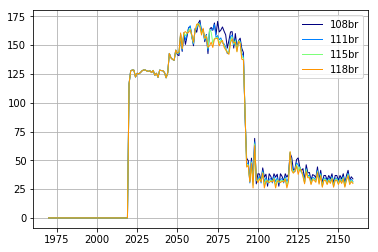

In [90]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


108br 157706.77855270318
111br 154723.06533703342
115br 153490.1891317321
118br 152217.9536410725


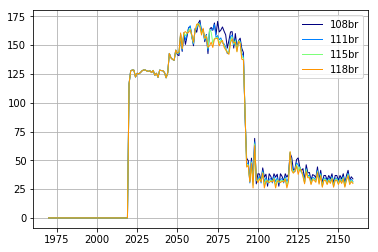

In [94]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


108br 0.0
111br 4.952380952380963
115br 7.80952380952381
118br 9.714285714285719


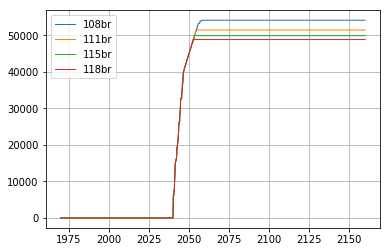

In [80]:
# cumulative LWR UNF reprocessed
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
print('Percent reduction in total LWR UNF reprocessed')
for key, val in cum_lwr_unf_rep_dict.items():
    plt.plot(years, val, label=key, linewidth=1)
    print(key, (1- max(val)/max(cum_lwr_unf_rep_dict['108br'])) * 100 )
plt.legend()
plt.grid()
plt.show()


In [96]:
z  =' xyz'
z.find('x')

1

In [98]:
# generate lifetime extension plots
file_list = ['108br.sqlite', '5yr_108.sqlite', '10yr_108.sqlite', '20yr_108.sqlite']


uox_rep_dict = {}
tot_rep_dict = {}

for file in file_list:
    if '_' in file:
        indx = file.find('_')
        name = file[:indx]
    else:
        name = 'base'
    
    print(name)
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in fuel_timeseries['uox_Pu']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x / used_comp) for x in fuel_timeseries['astrid_Pu']]
    
    uox_rep_dict[name] = rep_for_uox
    tot_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
   

5yr
10yr
20yr


base 106882.40204782452
5yr 111169.5894503851
10yr 115933.2972968748
20yr 125968.9817882365


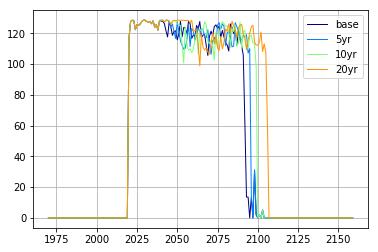

In [99]:
# just the uox
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in uox_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


base 151819.18122623712
5yr 142338.8497126541
10yr 146277.375037356
20yr 156332.8007373734


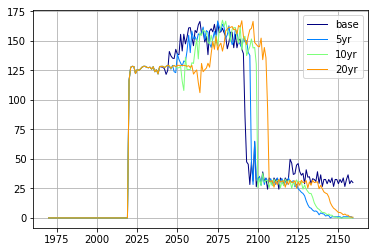

In [101]:
# total rep
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in tot_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()
